# Ejemplo radar


Modelo:  $y(n) = \alpha  x(n-D) + w(n)$

Donde:
- $x(n)$: señal transmitida
- $y(n)$: señal recibida
- $w(n)$: señal de ruido
- $\alpha$: coeficiente de atenuación
- $D$: retardo


In [1]:
from prbs.prbs import prbs
from scipy.signal import correlate
from numpy.random import normal
from numpy import hstack, zeros
import matplotlib.pyplot as plt
%matplotlib widget


La energía de la señal es 1000


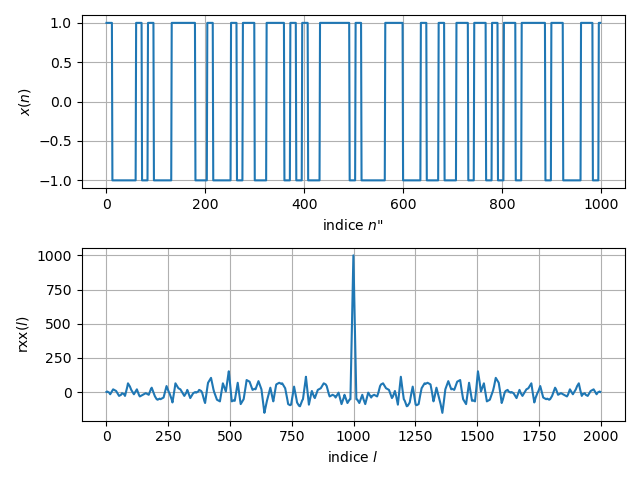

In [2]:
x= prbs(1000, 12)       # señal pseudo aleatoria binaria
x[x==0]=-1
rxx=correlate(x,x)      # autocorrelacion de x(n)
Ex=sum(x**2)           # energia de la señal x(n)

print(f"La energía de la señal es {Ex}")

f,ax=plt.subplots(2,1)
ax[0].plot(x)
ax[0].set_ylabel(r'$x(n)$')
ax[0].set_xlabel(r'indice $n$" ')
ax[1].plot(rxx)
ax[1].set_ylabel(r'rxx($l$)')
ax[1].set_xlabel(r'indice $l$ ')
for i in ax:
    i.grid()
f.tight_layout()


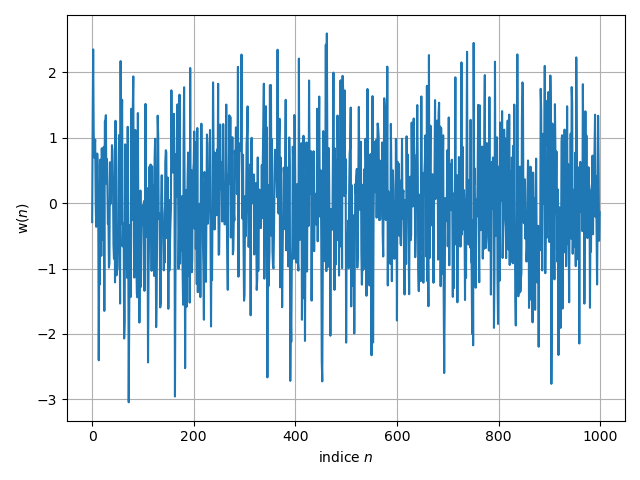

In [3]:
alpha=0.3; # coeficiente de atenuacion
w=normal(0, 1, (1000,))     # ruido blanco Gaussiano de media 0 y desviación standard unidad

f,ax=plt.subplots(1,1)
ax.plot(w)
ax.set_ylabel(r'w($n$)')
ax.set_xlabel(r'indice $n$ ')
ax.grid()
f.tight_layout()

La energía de la señal es 1039.1007104974128


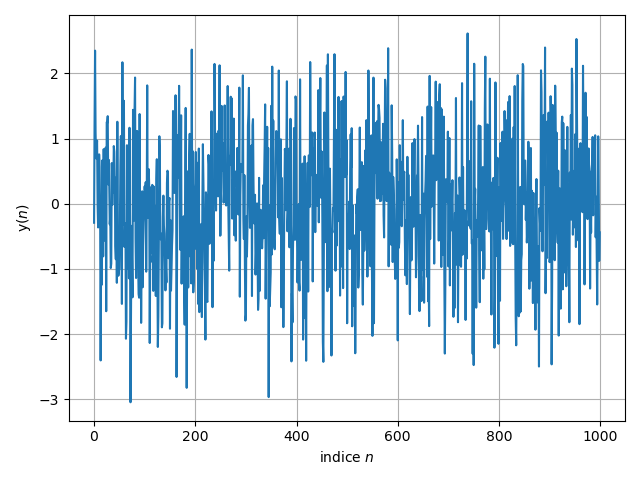

In [4]:
y=alpha * hstack((zeros((100, ), dtype=int), x[0:-100]))+w    # señal recibida

Ey=sum(y**2)           # energia de la señal x(n)
print(f"La energía de la señal es {Ey}")

f,ax=plt.subplots(1,1)
ax.plot(y)
ax.set_ylabel(r'y($n$)')
ax.set_xlabel(r'indice $n$ ')
ax.grid()
f.tight_layout()


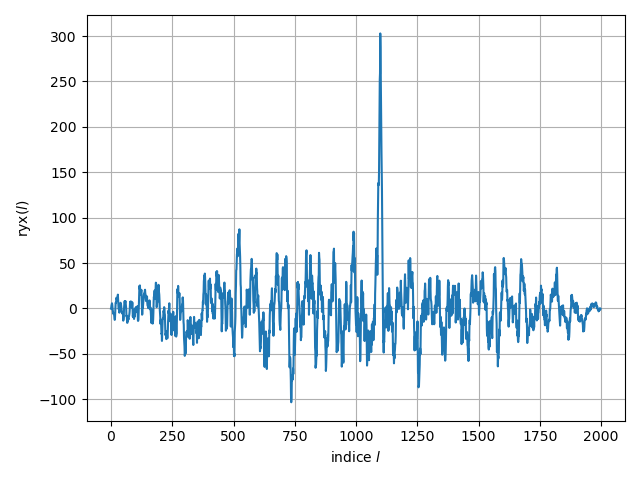

In [5]:
ryx = correlate(y,x)                                           # correlacion cruzada

f,ax=plt.subplots(1,1)
ax.plot(ryx)
ax.set_ylabel(r'ryx($l$)')
ax.set_xlabel(r'indice $l$ ')
ax.grid()
f.tight_layout()
